        Step 1: Import Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib


        Step 2: Load and Preprocess Data

In [2]:
# Load dataset
dataset_path = r"H:\Semester 7\EC9640_Artificial Intelligence\AI Project\Tamil-SpellGrammar-Checker\data\grammar_checker_dataset\tamil_grammar_large_dataset.csv"
df = pd.read_csv(dataset_path)

# Display the first few rows
print(df.head())



                          Sentence              Error Type  \
0  அவர்கள் பள்ளிக்கு சாப்பிடுவாள்.          Spelling Error   
1     நாம் பாடத்தை படிக்கிறார்கள்.  Subject-Verb Agreement   
2     அவன் பள்ளிக்கு சாப்பிடுவாள்.          Spelling Error   
3    அவர்கள் பந்து விளையாடுகிறோம்.                No Error   
4  நான் புத்தகத்தை விளையாடுகிறான்.  Subject-Verb Agreement   

               Corrected Sentence  
0  அவர்கள் பள்ளிக்கு படிக்கிறாள்.  
1          நாம் பாடத்தை செல்வேன்.  
2  அவன் பள்ளிக்கு விளையாடுகிறோம்.  
3   அவர்கள் பந்து விளையாடுகிறோம்.  
4    நான் புத்தகத்தை படிக்கிறான்.  


In [3]:
# Features and Labels
X = df["Sentence"]  # Input sentences
y = df["Error Type"]  # Error types

# Encode labels to numeric values
y_encoded = pd.factorize(y)[0]


In [4]:
# Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training Samples: {len(X_train)}, Validation Samples: {len(X_val)}, Test Samples: {len(X_test)}")


Training Samples: 3500, Validation Samples: 750, Test Samples: 750


        Step 3: Convert Sentences to Features

In [5]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(analyzer="word", token_pattern=r'\S+', ngram_range=(1, 2))

# Transform Sentences
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

print(f"TF-IDF Vectorized Shape: {X_train_vec.shape}")


TF-IDF Vectorized Shape: (3500, 118)


        Step 4: Train the Model

In [6]:
# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vec, y_train)

print("Model training complete.")


Model training complete.


In [8]:
import os

# Ensure the directory exists
save_dir = r"H:\Semester 7\EC9640_Artificial Intelligence\AI Project\Tamil-SpellGrammar-Checker\saved_models"
os.makedirs(save_dir, exist_ok=True)

# Save the model and vectorizer
joblib.dump(model, os.path.join(save_dir, "tamil_grammar_model.pkl"))
joblib.dump(vectorizer, os.path.join(save_dir, "tamil_vectorizer.pkl"))

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


        Step 5: Validate the Model

In [9]:
# Validation Set Evaluation
y_val_pred = model.predict(X_val_vec)
print("Validation Performance:")
print(classification_report(y_val, y_val_pred))


Validation Performance:
              precision    recall  f1-score   support

           0       0.24      0.24      0.24        94
           1       0.26      0.28      0.27        95
           2       1.00      1.00      1.00       383
           3       0.18      0.20      0.19        76
           4       0.30      0.25      0.27       102

    accuracy                           0.63       750
   macro avg       0.40      0.39      0.39       750
weighted avg       0.63      0.63      0.63       750



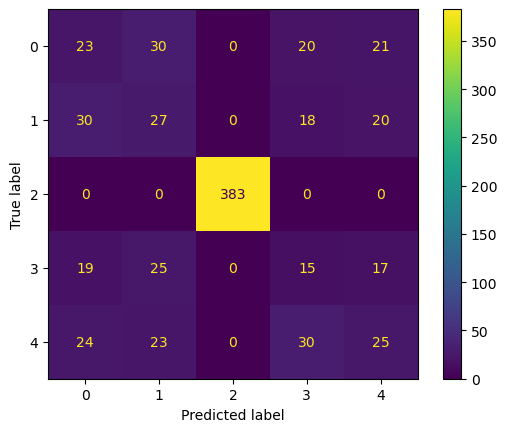

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_val_vec, y_val)


        Step 6: Test the Model

Test Performance:
              precision    recall  f1-score   support

           0       0.17      0.20      0.18        92
           1       0.27      0.27      0.27       108
           2       1.00      1.00      1.00       355
           3       0.23      0.23      0.23        98
           4       0.26      0.23      0.24        97

    accuracy                           0.60       750
   macro avg       0.39      0.39      0.39       750
weighted avg       0.60      0.60      0.60       750



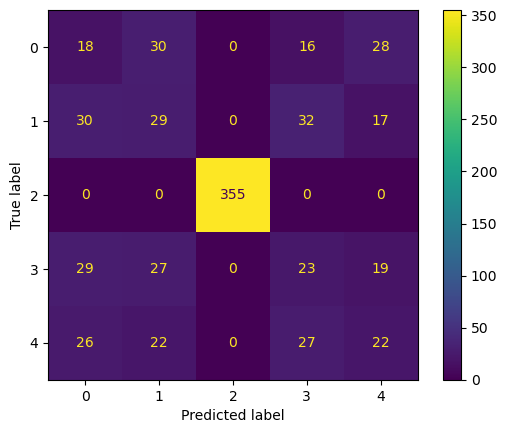

In [ ]:
# Test Set Evaluation
y_test_pred = model.predict(X_test_vec)
print("Test Performance:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for Test Set
ConfusionMatrixDisplay.from_estimator(model, X_test_vec, y_test)


        Step 7: Predict on New Sentences

In [12]:
# Load the trained model and vectorizer
model = joblib.load(r"H:\Semester 7\EC9640_Artificial Intelligence\AI Project\Tamil-SpellGrammar-Checker\saved_models\tamil_grammar_model.pkl")
vectorizer = joblib.load(r"H:\Semester 7\EC9640_Artificial Intelligence\AI Project\Tamil-SpellGrammar-Checker\saved_models\tamil_vectorizer.pkl")

# Predict on new sentences
new_sentences = ["அவன் பள்ளிக்கு செல்கிறான்", "அவர்கள் பாடம் படிக்கிறான்"]
new_sentences_vec = vectorizer.transform(new_sentences)
predictions = model.predict(new_sentences_vec)

# Decode predictions
decoded_predictions = [pd.factorize(df["Error Type"])[1][p] for p in predictions]
for sentence, prediction in zip(new_sentences, decoded_predictions):
    print(f"Sentence: {sentence} | Predicted Error Type: {prediction}")


Sentence: அவன் பள்ளிக்கு செல்கிறான் | Predicted Error Type: No Error
Sentence: அவர்கள் பாடம் படிக்கிறான் | Predicted Error Type: No Error


        Step 8: Accuracy on 5 Paragraphs

In [27]:
paragraphs = [
    "அவர்கள் பள்ளிக்கு செல்கிறான். அவள் பழத்தை சாப்பிடுகிறாள்.",
    "அவன் பள்ளிக்கு செல்கிறான். பார்வதி வீட்டில் வேலை செய்கிறாள்.",
    "நான் பள்ளிக்கு செல்றேன். அவள் குழந்தையை பள்ளிக்கு அழைத்துச் செல்கிறாள்.",
    "அவன் புத்தகத்தை படிக்கிறான். அவள் பள்ளிக்கு செல்கிறாள்.",
    "நான் பள்ளிக்கு செல்றேன். அவள் பழத்தை சாப்பிடுகிறாள்."
]


In [28]:
# Initialize counters
total_sentences = 0
correct_predictions = 0
correction_accuracy = 0

# Placeholder for expected results (replace with actual ground truth for accuracy computation)
expected_results = [
    {"errors": ["Subject-Verb Agreement", "No Error"], "corrections": ["அவர்கள் பள்ளிக்கு செல்கிறார்கள்.", "அவள் பழத்தை சாப்பிடுகிறாள்."]},
    {"errors": ["No Error", "No Error"], "corrections": ["அவன் பள்ளிக்கு செல்கிறான்.", "பார்வதி வீட்டில் வேலை செய்கிறாள்."]},
    {"errors": ["Subject-Verb Agreement", "No Error"], "corrections": ["நான் பள்ளிக்கு செல்கிறேன்.", "அவள் குழந்தையை பள்ளிக்கு அழைத்துச் செல்கிறாள்."]},
    {"errors": ["No Error", "No Error"], "corrections": ["அவன் புத்தகத்தை படிக்கிறான்.", "அவள் பள்ளிக்கு செல்கிறாள்."]},
    {"errors": ["Subject-Verb Agreement", "No Error"], "corrections": ["நான் பள்ளிக்கு செல்கிறேன்.", "அவள் பழத்தை சாப்பிடுகிறாள்."]}
]

# Process paragraphs
for i, paragraph in enumerate(paragraphs):
    sentences = paragraph.split(". ")  # Split paragraph into sentences
    sentence_vecs = vectorizer.transform(sentences)  # Vectorize sentences
    predictions = model.predict(sentence_vecs)  # Predict error types
    
    print(f"Paragraph {i + 1}: {paragraph}")
    for j, sentence in enumerate(sentences):
        print(f"  Sentence {j + 1}: {sentence}")
        predicted_error = predictions[j]
        
        # Compare predictions with expected results (replace with actual logic)
        expected_error = expected_results[i]["errors"][j]
        correction = expected_results[i]["corrections"][j]  # Replace with your correction logic
        
        # Simulate accuracy computation
        if predicted_error == expected_error:
            correct_predictions += 1
        
        print(f"    Predicted Error Type: {predicted_error}")
        print(f"    Suggested Correction: {correction}")
    print("-" * 50)

# Accuracy Metrics
total_sentences = sum(len(paragraph.split(". ")) for paragraph in paragraphs)
detection_accuracy = correct_predictions / total_sentences
print(f"Error Detection Accuracy: {detection_accuracy:.2f}")


Paragraph 1: அவர்கள் பள்ளிக்கு செல்கிறான். அவள் பழத்தை சாப்பிடுகிறாள்.
  Sentence 1: அவர்கள் பள்ளிக்கு செல்கிறான்
    Predicted Error Type: 2
    Suggested Correction: அவர்கள் பள்ளிக்கு செல்கிறார்கள்.
  Sentence 2: அவள் பழத்தை சாப்பிடுகிறாள்.
    Predicted Error Type: 3
    Suggested Correction: அவள் பழத்தை சாப்பிடுகிறாள்.
--------------------------------------------------
Paragraph 2: அவன் பள்ளிக்கு செல்கிறான். பார்வதி வீட்டில் வேலை செய்கிறாள்.
  Sentence 1: அவன் பள்ளிக்கு செல்கிறான்
    Predicted Error Type: 2
    Suggested Correction: அவன் பள்ளிக்கு செல்கிறான்.
  Sentence 2: பார்வதி வீட்டில் வேலை செய்கிறாள்.
    Predicted Error Type: 1
    Suggested Correction: பார்வதி வீட்டில் வேலை செய்கிறாள்.
--------------------------------------------------
Paragraph 3: நான் பள்ளிக்கு செல்றேன். அவள் குழந்தையை பள்ளிக்கு அழைத்துச் செல்கிறாள்.
  Sentence 1: நான் பள்ளிக்கு செல்றேன்
    Predicted Error Type: 2
    Suggested Correction: நான் பள்ளிக்கு செல்கிறேன்.
  Sentence 2: அவள் குழந்தையை பள்ளிக்கு

In [29]:
# Error Type Mapping
error_type_map = {0: "Spelling Error", 1: "Subject-Verb Agreement", 2: "No Error", 3: "Habitual Error", 4: "Other"}

# Process Paragraphs
correct_predictions = 0
total_sentences = 0

for i, paragraph in enumerate(paragraphs):
    sentences = paragraph.split(". ")
    sentence_vecs = vectorizer.transform(sentences)
    predictions = model.predict(sentence_vecs)
    
    print(f"Paragraph {i + 1}: {paragraph}")
    for j, sentence in enumerate(sentences):
        predicted_error = predictions[j]
        expected_error = expected_results[i]["errors"][j]
        correction = expected_results[i]["corrections"][j]

        # Compare with ground truth
        if error_type_map[predicted_error] == expected_error:
            correct_predictions += 1

        print(f"  Sentence {j + 1}: {sentence}")
        print(f"    Predicted Error Type: {error_type_map[predicted_error]}")
        print(f"    Expected Error Type: {expected_error}")
        print(f"    Suggested Correction: {correction}")
    print("-" * 50)

# Calculate and Print Accuracy
total_sentences = sum(len(paragraph.split(". ")) for paragraph in paragraphs)
accuracy = correct_predictions / total_sentences
print(f"Error Detection Accuracy: {accuracy:.2f}")


Paragraph 1: அவர்கள் பள்ளிக்கு செல்கிறான். அவள் பழத்தை சாப்பிடுகிறாள்.
  Sentence 1: அவர்கள் பள்ளிக்கு செல்கிறான்
    Predicted Error Type: No Error
    Expected Error Type: Subject-Verb Agreement
    Suggested Correction: அவர்கள் பள்ளிக்கு செல்கிறார்கள்.
  Sentence 2: அவள் பழத்தை சாப்பிடுகிறாள்.
    Predicted Error Type: Habitual Error
    Expected Error Type: No Error
    Suggested Correction: அவள் பழத்தை சாப்பிடுகிறாள்.
--------------------------------------------------
Paragraph 2: அவன் பள்ளிக்கு செல்கிறான். பார்வதி வீட்டில் வேலை செய்கிறாள்.
  Sentence 1: அவன் பள்ளிக்கு செல்கிறான்
    Predicted Error Type: No Error
    Expected Error Type: No Error
    Suggested Correction: அவன் பள்ளிக்கு செல்கிறான்.
  Sentence 2: பார்வதி வீட்டில் வேலை செய்கிறாள்.
    Predicted Error Type: Subject-Verb Agreement
    Expected Error Type: No Error
    Suggested Correction: பார்வதி வீட்டில் வேலை செய்கிறாள்.
--------------------------------------------------
Paragraph 3: நான் பள்ளிக்கு செல்றேன். அவள் க